<a href="https://colab.research.google.com/github/islavathnaveennaik/Regression_notes/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regresion


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('student_scores.csv') #read the dataset

In [ ]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
dataset.Hours.quantile(0.75)

7.4

In [ ]:
iqr = dataset.Hours.quantile(0.75) - dataset.Hours.quantile(0.25)
iqr
upper_threshold = dataset.Hours.quantile(0.75) + (1.5 * iqr) # > q3 + 1.5iqr
lower_threshold = dataset.Hours.quantile(0.25) - (1.5 * iqr) # < q1 - 1.5iqr
upper_threshold, lower_threshold

(14.450000000000001, -4.3500000000000005)

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in the data

In [ ]:
dataset.isnull().sum()

,0
Hours,0
Scores,0


In [ ]:
dataset = dataset.drop_duplicates() # code to delete duplicates
dataset.shape

(25, 2)

In [ ]:
dataset.dtypes

,0
Hours,float64
Scores,int64


#Median and mean are closer to each other - there is less skew in the dat


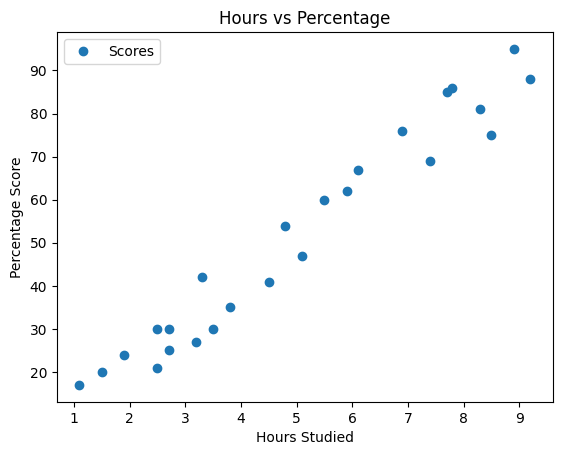

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

1) Is there any relationship between the feature and target - Yes 2) Is there any linear relationship between the feature and target - Yes 3) No transformation is required


In [ ]:
dataset.corr() # correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.


In [ ]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

#Preparing the data


In [ ]:
a = [1,2,3,4]
a[:-2]

[1, 2]

In [ ]:
#dataset.iloc[row_criteria,column_criteria

In [ ]:
X = dataset.loc[:, ['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Scores'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 45)

In [ ]:
X, y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [ ]:
y_test

array([30, 30, 42, 85, 24, 86, 35])

In [ ]:
X_train.shape, X_test.shape

((18, 1), (7, 1))

#Normlising/Scaling the data


In [ ]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# shivaData = np.array([1.4,2.3,3.3,4,-4]).reshape(-1,1)
# scaler = MinMaxScaler()
# scaler.fit(shivaData)
# scaler.transform(shivaData)

In [ ]:
# scaler.var_

In [ ]:
X_test

array([[2.5],
       [2.7],
       [3.3],
       [7.7],
       [1.9],
       [7.8],
       [3.8]])

#Modelling


In [ ]:
#Model for algorithm - score = (m * hours) + c

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

1.431512900311212


In [ ]:
print(regressor.coef_) # slope - m

# predicted score  = 9.72 * (hours) + 1.43

[9.72000803]


In [ ]:
regressor.predict([[12]]) # perils of extrapolations

array([118.07160928])

In [ ]:
#regressor.predict(scaler.transform(np.array([4]).reshape(-1,1)))

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([25.73153298, 27.67553458, 33.5075394 , 76.27557474, 19.89952816,
       77.24757554, 38.36754342])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,30,25.731533
1,30,27.675535
2,42,33.507539
3,85,76.275575
4,24,19.899528
5,86,77.247576
6,35,38.367543


In [ ]:
regressor.predict([[12],[11]]) # perils of extrapolation

array([118.07160928, 108.35160124])

In [ ]:
x = input()
x

9


'9'

#Metrics


In [ ]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9347551352640703


#Multiple Linear Regression


In [ ]:
import pandas as pd
dataset = pd.read_csv('petrol_consumption.csv')

In [ ]:
dataset.head()
#dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.shape

(48, 5)

In [ ]:
dataset.isnull().sum()

,0
Petrol_tax,0
Average_income,0
Paved_Highways,0
Population_Driver_licence(%),0
Petrol_Consumption,0


In [ ]:
dataset.dtypes

,0
Petrol_tax,float64
Average_income,int64
Paved_Highways,int64
Population_Driver_licence(%),float64
Petrol_Consumption,int64


In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
iqr = dataset['Petrol_tax'].quantile(0.75) - dataset['Petrol_tax'].quantile(0.25)
upper_threshold = dataset['Petrol_tax'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Petrol_tax'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Petrol_tax = dataset.Petrol_tax.clip(lower_threshold, upper_threshold)

9.8125 5.3125


In [ ]:
iqr = dataset['Average_income'].quantile(0.75) - dataset['Average_income'].quantile(0.25)
upper_threshold = dataset['Average_income'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Average_income'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Average_income = dataset.Average_income.clip(lower_threshold, upper_threshold)

5838.375 2479.375


In [ ]:
iqr = dataset['Paved_Highways'].quantile(0.75) - dataset['Paved_Highways'].quantile(0.25)
upper_threshold = dataset['Paved_Highways'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Paved_Highways'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Paved_Highways = dataset.Paved_Highways.clip(lower_threshold, upper_threshold)

13224.625 -2958.375


In [ ]:
iqr = dataset['Population_Driver_licence(%)'].quantile(0.75) - dataset['Population_Driver_licence(%)'].quantile(0.25)
upper_threshold = dataset['Population_Driver_licence(%)'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Population_Driver_licence(%)'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset['Population_Driver_licence(%)'] = dataset['Population_Driver_licence(%)'].clip(lower_threshold, upper_threshold)

0.6934999999999998 0.4315000000000002


In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.670937,4241.833333,5450.442708,0.569698,576.770833
std,0.923415,573.623768,3149.104278,0.053823,111.885816
min,5.312500,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,9.812500,5342.000000,13224.625000,0.693500,968.000000


In [ ]:
dataset.shape

(48, 5)

#EDA


In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

,Petrol_Consumption
Petrol_tax,
5.3125,640.000000
6.0000,782.000000
6.5800,644.000000
7.0000,631.736842
7.5000,536.000000
8.0000,502.000000
8.5000,582.666667
9.0000,530.875000
9.8125,457.000000


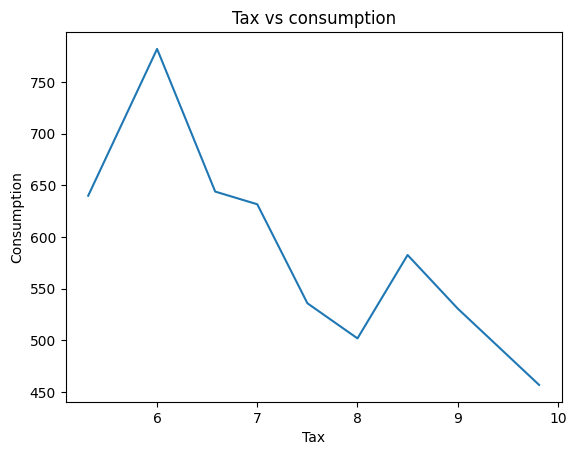

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [ ]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.000000,-0.455955
Petrol_Consumption,-0.455955,1.000000


1) There is a linear relationship between tax and consumption 2) As tax increases, comsumption decreases which is in-line with our GK 3) No transformation required - we can consider the feature for linear regression


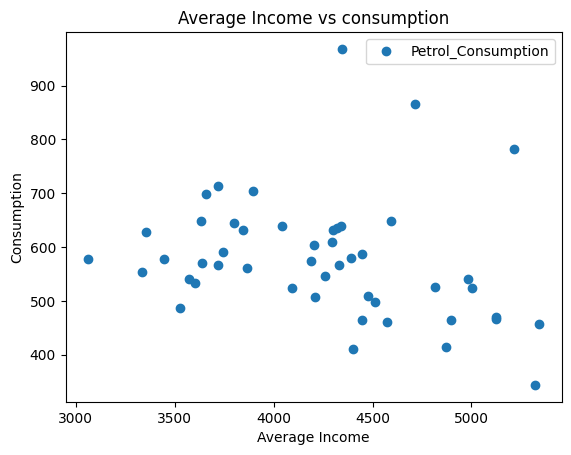

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [ ]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
dataset[['Average_income','Petrol_Consumption']].corr()

1) There is a low linear relationshp between the data 2) No transformation reqd 3) The direction of relatiohsnip is not in-line with our GK

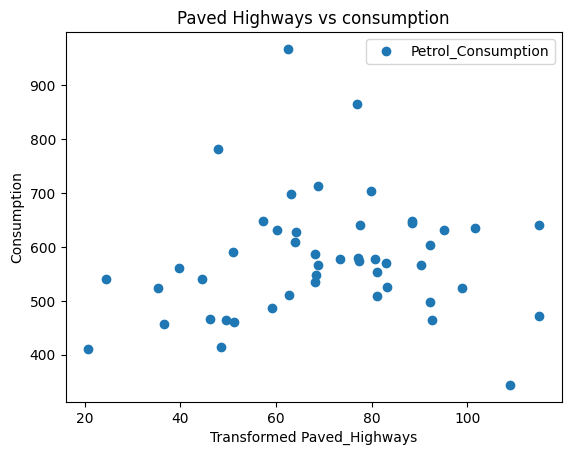

,transformed,Petrol_Consumption
transformed,1.000000,0.084753
Petrol_Consumption,0.084753,1.000000


In [ ]:
import numpy as np
dataset['transformed'] = np.power(dataset['Paved_Highways'], 0.5) # transformation
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

In [ ]:
del dataset['Paved_Highways']

1) There is no linear relationship between highways and consumption 2) Have tried all trasnformations - still not able to see a good linear relationship 3) Have decided to drop the feature


In [ ]:
#dataset['logPaved_Highways']  = np.log(dataset['Paved_Highways'])

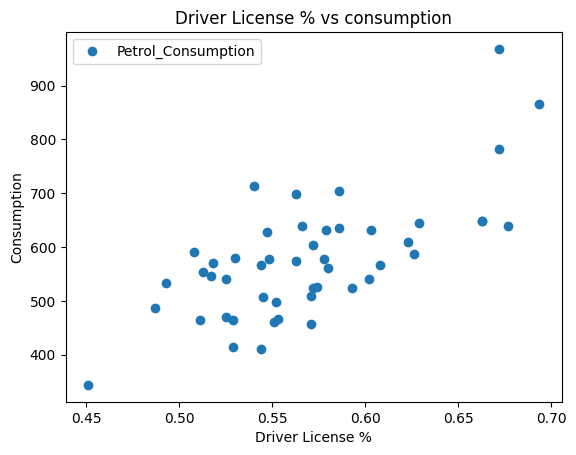

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.689301
Petrol_Consumption,0.689301,1.000000


In [ ]:
dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()


1) High correlation between the data 2) No transformation reqd

In [ ]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

#Model training


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -21 *scaled_petrol_tax + -44 * scaled_avg_income +  63 * scaled_pop_driver + 559

,Coefficient
Petrol_tax,-26.773287
Average_income,-42.356346
Population_Driver_licence(%),84.959759


In [ ]:
regressor.predict(scaler.transform(np.array([[8, 3500, 0.5]])))

array([517.37082437])

In [ ]:
regressor.intercept_ # c

576.9210526315788

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,534,468.502505
1,577,669.890238
2,631,629.093698
3,524,554.232785
4,566,653.365860
5,640,661.389978
6,603,607.101446
7,640,713.211961
8,580,498.048499
9,467,479.413133


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.2027990538889095


#Feature Selection


#RFE


In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

[('Petrol_tax', True), ('Average_income', True), ('LogPaved_Highways', True)]

#Sequential Feature selection


In [ ]:
!pip install scikit-learn==0.24.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

[('Petrol_tax', True), ('Average_income', False), ('LogPaved_Highways', True)]


In [ ]:
list(zip([1,2,3],['a','b','c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [ ]:
X_trans = sfs.transform(X)
X_trans # feature selection

array([[9.    , 0.525 ],
       [9.    , 0.572 ],
       [9.    , 0.58  ],
       [7.5   , 0.529 ],
       [8.    , 0.544 ],
       [9.8125, 0.571 ],
       [8.    , 0.451 ],
       [8.    , 0.553 ],
       [8.    , 0.529 ],
       [7.    , 0.552 ],
       [8.    , 0.53  ],
       [7.5   , 0.525 ],
       [7.    , 0.574 ],
       [7.    , 0.545 ],
       [7.    , 0.608 ],
       [7.    , 0.586 ],
       [7.    , 0.572 ],
       [7.    , 0.54  ],
       [7.    , 0.6935],
       [8.5   , 0.677 ],
       [7.    , 0.663 ],
       [8.    , 0.602 ],
       [9.    , 0.511 ],
       [9.    , 0.517 ],
       [8.5   , 0.551 ],
       [9.    , 0.544 ],
       [8.    , 0.548 ],
       [7.5   , 0.579 ],
       [8.    , 0.563 ],
       [9.    , 0.493 ],
       [7.    , 0.518 ],
       [7.    , 0.513 ],
       [8.    , 0.578 ],
       [7.5   , 0.547 ],
       [8.    , 0.487 ],
       [6.58  , 0.629 ],
       [5.3125, 0.566 ],
       [7.    , 0.586 ],
       [8.5   , 0.663 ],
       [7.    , 0.672 ],


#Cross Validation


In [80]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform (replace X with your actual data)
X_scaled = scaler.fit_transform(X)

# Initialize the LinearRegression model without 'normalize'
regressor = LinearRegression()

# Now you can use cross_validate with the scaled data
cv_results = cross_validate(regressor, X_scaled, y, cv=10, scoring="r2")

# Print the average R^2 score
print(cv_results['test_score'].mean())

-0.13664886940859136


In [81]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

-0.13664886940858784

#Ridge Regression


In [78]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_scaled = scaler.fit_transform(X)

for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(alpha = alpha) # Removed normalize=True
  cv_results = cross_validate(regressor, X_scaled, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 0.15477806042011752 0.6602887757905171
Alpha :  0.002 0.15479644039822132 0.660288774369907
Alpha :  0.003 0.15481481567675148 0.6602887720024431
Alpha :  0.005 0.15485155213850277 0.6602887644276744
Alpha :  0.01 0.15494331111011433 0.6602887289334017
Alpha :  0.02 0.1551264772041205 0.6602885870611191
Alpha :  0.03 0.15530917487587054 0.6602883508266529
Alpha :  0.04 0.15549140497581065 0.6602880204090328
Alpha :  0.1 0.15657501396338136 0.6602840700354486
Alpha :  0.2 0.15834418376525586 0.6602700694588977
Alpha :  0.5 0.16338287659673117 0.6601740277580607
Alpha :  1 0.17093129485743913 0.6598436618565522
